# Entrega Opti

En este trabajo se pretende implementar los algoritmos vistos en clase oara resolver el problema del camino mínimo. 
Por ello, se implementarán los algoritmos de Bellman-Ford y Dijkstra:



Comencemos viendo la implementación de Bellman-Ford, que tiene por argumento una matriz que representa los costes de las diferentes aristas del grafo, pudiendo ser estas negativas, siendo el origen del que queremos partir el de la primera fila y el vértice de destino el de la última fila.

In [67]:
from copy import copy
from typing import List
import time

In [70]:
def bellmanford(matriz:List[List[float]])->List[int]:
    inicio = time.time()
    n_vert = len(matriz[0])
    padre = [0]*n_vert         #Inicializamos una lista con todos los padres inicializados en 0, el origen.
    distancia = matriz[0]      #Inicializamos la lista de distancias del origen a los distintos nodos.
    
    for t in range(n_vert):    #Realizamos n iteraciones, para comprobar si hay ciclos negativos.
        print("distancias:", distancia)
        print("padres:", padre)
        distancia_1 = distancia.copy()
        for j in range(n_vert):       #Comenzamos comparando todas las columnas.
            lista_pasos_t =[]         #Inicializamos una lista para calcular todos los costes de un nodo a otro.
            for l in range(n_vert):   #Vamos a crear una lista con estos costes, para hallar el mínimo después.
                if l != j:
                    lista_pasos_t.append(distancia[l]+matriz[l][j])
                else:
                    lista_pasos_t.append(float("inf"))
                    
            paso_t = min(lista_pasos_t)                   #Calculamos el mínimo de estos costes y lo fijamos.
            k = lista_pasos_t.index(min(lista_pasos_t))   #Obtenemos el nodo donde hemos fijado.
            distancia_1[j] = min(distancia[j],paso_t)     #Actualizamos la tabla de la iteración siguiente.
            
            if distancia[j] > paso_t:                     
                padre[j] = k                              #Actualizamos el padre si es necesario.
        
        T = True                                          #Vemos si estamos en el óptimo, si no continuamos.
        for t in range(n_vert):
            if distancia_1[t] != distancia[t]:
                T = False
                break
        if T == True:
            break
        if t == n_vert:
            return print("El grafo contiene ciclos negativos, no hay camino mínimo")
        

        distancia = distancia_1                           #Desehechamos la última iteración y empezamos una nueva.
    fin = time.time()
    print("Tiempo de ejecución:", fin-inicio)
    return padre
            

Ahora, implementamos un código alternativo del algoritmo de Bellman-Ford, usando la matriz de adyacencia esta vez: 


In [39]:
def bellman_ford_alternativo(A:List[List[float]])->List[int]:
    inicio = time.time()
    num_vertices = len(A[0])
    range_vert = range(num_vertices)
    adyacencia = []                                                 #Creamos la matriz de adyacencia.
    for fila_A in range_vert:
        adyacencia = adyacencia + [[]]
        for col_A in range_vert:
            if A[fila_A][col_A] < w and fila_A != col_A:
                adyacencia[fila_A] = adyacencia[fila_A] + [1]
            else:
                adyacencia[fila_A] = adyacencia[fila_A] + [0]

    padres = [0] * num_vertices                                     #Creamos la lista de los padres.
    list_distancia_origen = A[0]                                    #Tomamos la distancia al origen de cada vértice.
    for iteracion in range_vert:
        if iteracion == 0:
            list_distancia_anterior = list_distancia_origen
        list_distancia_nueva = list_distancia_anterior.copy()
                                  
        for fila_A in range_vert:
            aux_min = []                                            #Lista para el calculo del mínimo en cada iteración. 
            for col_A in range_vert:
                if adyacencia[col_A][fila_A] == 1:
                    aux_min = aux_min + [list_distancia_anterior[col_A] + A[col_A][fila_A]]
                else:
                    aux_min = aux_min + [w]
            if min(aux_min) <= list_distancia_anterior[fila_A]:     #Iteramos con los datos recogidos.
                padres[fila_A] = aux_min.index(min(aux_min))
                list_distancia_nueva[fila_A] =  min(aux_min)

        T = True                                                    #Vemos si estamos en el óptimo.
        for t in range_vert:
            if list_distancia_nueva[t] != list_distancia_anterior[t]:
                T = False
        if T == True:
            break
        if iteracion == num_vertices -1:
            return print("El grafo contiene ciclos negativos, no hay camino mínimo")
        list_distancia_anterior = list_distancia_nueva              #Deshechamos la iteración más antigua.
    fin = time.time()
    print("Tiempo de ejecución:", fin-inicio)
    return padres

A continuación, implementamos el algoritmo de Dijkstra, 
que tiene por argumento una matriz que representa los costes de las diferentes aristas del grafo,
teniendo que ser todos positivos esta vez, 
siendo el origen del que queremos partir el de la primera fila.

In [72]:
def dijkstra(matriz:List[List[float]])->List[int]:
    inicio = time.time()
    padre = [0]*len(matriz[0])                      #Inicializamos una lista con el padre para cada nodo
    P = [0]                                         #A continuación, inicializamos una lista de nodos permanentes y otra para los transitorios
    T = []
    for i in range(1,len(matriz)):                  #Añadimos todos los nodos transitorios a la lista correspondiente
        T.append(i)
    u = matriz[0]                                   #Al igual que en el algoritmo de Bellman-Ford, construimos una lista que nos indica la distancia del nodo 1 al j con t arcos (comenzando con t=1) 
    while len(T) != 0:
        print("distancias:",u)
        print("padre:",padre)
        candidatos = []                             #Creamos la matriz de candidatos de los posibles nodos a los que se puede ir, es decir, los de T
        for j in T:
            candidatos.append(u[j])
        paso = min(candidatos)                      #Calculamos el menor paso con su índice y actualizamos los nodos permanentes y transitorios
        k = u.index(paso)
        P.append(k)
        T.remove(k)
        for j in T:                                 #Actualizamos el padre en caso de ser necesario y el coste del paso
            if u[j] > paso + matriz[k][j] :
                padre[j] = k
            u[j] = min(u[j], u[k] + matriz[k][j])
    fin = time.time()
    print("Tiempo de ejecución:", fin-inicio)    
    return padre

Seguidamente, veremos la implementación de los algoritmos en ejemplos concretos. Para hacerlo, utilizaremos el ejercicio 5 de la Hoja de Problemas del Campus Virtual.


La matriz siguiente recoge las distancias directas por carretera entre las diferentes localidades de una isla medidas en kilómetros (las filas son las ciudades origen y si aparece el valor infinito se entiende que no existe una conexión directa entre ese par de localidades). Aplicar un algoritmo de redes para hallar el camino más corto de la ciudad 1 a todas las demás.

\begin{pmatrix}
    0&6&11&3&\infty&14&18\\
    \infty&0&4&\infty&\infty&\infty&\infty\\
    \infty&\infty&0&\infty&\infty&4&\infty\\
    \infty&2&\infty&0&3&\infty&\infty\\
    \infty&\infty&2&\infty&0&\infty&10\\
    \infty&\infty&\infty&\infty&7&0&3\\
    \infty&\infty&\infty&5&\infty&\infty&0
\end{pmatrix}

Para representarlo como grafo, importamos la librería NetworkX que contiene funciones específicas de representacción y resolución de grafos.


In [60]:
import networkx as nx

Representándolo como grafo se tiene:


In [63]:
G = nx.DiGraph()
G.add_edge("0","1", weight = 6)
G.add_edge("0","2", weight = 11)
G.add_edge("0","3", weight = 3)
G.add_edge("0","5", weight = 14)
G.add_edge("0","6", weight = 18)
G.add_edge("1","2", weight = 4)
G.add_edge("2","5", weight = 4)
G.add_edge("3","1", weight = 2)
G.add_edge("3","4", weight = 3)
G.add_edge("4","2", weight = 2)
G.add_edge("4","6", weight = 10)
G.add_edge("5","4", weight = 7)
G.add_edge("5","6", weight = 3)
G.add_edge("6","3", weight = 5)

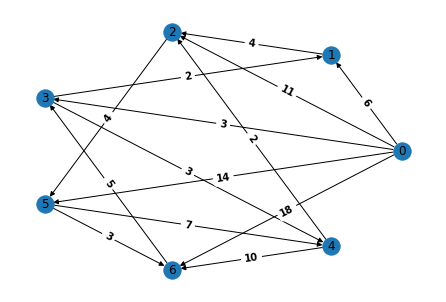

In [64]:
import matplotlib.pyplot as plt
pos = nx.circular_layout(G)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G,pos,with_labels=True)
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,font_weight="bold")
plt.show()

Aquí, dejamos un ejemplo de su ejecución:

In [71]:
w = float("inf") 
bellmanford([[0,6,11,3,w,14,18],[w,0,4,w,w,w,w],[w,w,0,w,w,4,w],[w,2,w,0,3,w,w],[w,w,2,w,0,w,10],[w,w,w,w,7,0,3],[w,w,w,5,w,w,0]])

distancias: [0, 6, 11, 3, inf, 14, 18]
padres: [0, 0, 0, 0, 0, 0, 0]
distancias: [0, 5, 10, 3, 6, 14, 17]
padres: [0, 3, 1, 0, 3, 0, 5]
distancias: [0, 5, 8, 3, 6, 14, 16]
padres: [0, 3, 4, 0, 3, 0, 4]
distancias: [0, 5, 8, 3, 6, 12, 16]
padres: [0, 3, 4, 0, 3, 2, 4]
distancias: [0, 5, 8, 3, 6, 12, 15]
padres: [0, 3, 4, 0, 3, 2, 5]
Tiempo de ejecución: 0.005857944488525391


[0, 3, 4, 0, 3, 2, 5]

Aquí, dejamos un ejemplo de su ejecución:

In [73]:
w = float("inf") 
dijkstra([[0,6,11,3,w,14,18],[w,0,4,w,w,w,w],[w,w,0,w,w,4,w],[w,2,w,0,3,w,w],[w,w,2,w,0,w,10],[w,w,w,w,7,0,3],[w,w,w,5,w,w,0]])

distancias: [0, 6, 11, 3, inf, 14, 18]
padre: [0, 0, 0, 0, 0, 0, 0]
distancias: [0, 5, 11, 3, 6, 14, 18]
padre: [0, 3, 0, 0, 3, 0, 0]
distancias: [0, 5, 9, 3, 6, 14, 18]
padre: [0, 3, 1, 0, 3, 0, 0]
distancias: [0, 5, 8, 3, 6, 14, 16]
padre: [0, 3, 4, 0, 3, 0, 4]
distancias: [0, 5, 8, 3, 6, 12, 16]
padre: [0, 3, 4, 0, 3, 2, 4]
distancias: [0, 5, 8, 3, 6, 12, 15]
padre: [0, 3, 4, 0, 3, 2, 5]
Tiempo de ejecución: 0.0014848709106445312


[0, 3, 4, 0, 3, 2, 5]

Puesto que los problemas de camino mínimo puede verse como un problema de programación lineal, veamos cómo modelizaríamos este ejemplo:

In [ ]:
#Aquí hay que poner el problema modelizado

Veamos que obtenemos la misma solución con la modelización lineal que anteriormente. Para ello, utilizaremos la librería GUROBIPY, la cual nos permite resolver problemas de programación lineal. 